In [1]:
import os
import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt
#Celsius to Fahrenheit Formula: (°C * 1.8) + 32 = °F


df = pd.read_csv("clean_weather_health.csv")
df.head()

,date,temperature,wind_speed,surface_solar_radiation,total_cloud_cover,total_precipitation,relative_humidity,county,state,fips,state_id,population,lat,lng,cases,deaths,cases_per_100k,deaths_per_100k
0,2020-03-15,12.19,2.66,46,1.00,0.08,0.72,Anderson,South Carolina,45007,SC,198064,34.5193,-82.6378,2,0.0,1.009775,0.0
1,2020-03-16,12.74,0.49,112,0.98,0.23,0.79,Anderson,South Carolina,45007,SC,198064,34.5193,-82.6378,2,0.0,1.009775,0.0
2,2020-03-17,15.40,1.45,111,0.66,0.01,0.83,Anderson,South Carolina,45007,SC,198064,34.5193,-82.6378,2,0.0,1.009775,0.0
3,2020-03-18,19.84,1.06,143,0.94,0.19,0.80,Anderson,South Carolina,45007,SC,198064,34.5193,-82.6378,2,0.0,1.009775,0.0
4,2020-03-19,21.98,3.13,222,0.92,0.00,0.69,Anderson,South Carolina,45007,SC,198064,34.5193,-82.6378,3,0.0,1.514662,0.0


In [2]:
df=df.sort_values(by=['fips','date'])

In [3]:
df["new_cases_per_100k"]=""
df["new_deaths_per_100k"]=""
curr_cases = 0
prior_day_cases = 0
curr_deaths = 0
prior_day_deaths = 0
curr_county=""
prior_county=""

In [4]:
for index, row in df.iterrows():
    curr_county= row["fips"]
    curr_cases = row["cases_per_100k"]
    curr_deaths = row["deaths_per_100k"]
    
    if curr_county == prior_county:
        new_cases = (curr_cases - prior_day_cases)
        new_deaths = (curr_deaths - prior_day_deaths)
    
    else:
        new_cases = curr_cases
        new_deaths= (curr_deaths) 
        
    df.loc[index,"new_cases_per_100k"]= new_cases
    df.loc[index,"new_deaths_per_100k"]= new_deaths
    
    prior_county = curr_county
    prior_day_cases = curr_cases
    prior_day_deaths = curr_deaths
    


In [6]:
daily_df=df.copy()
#daily_df.to_csv("new_cases.csv", index=False, header=True)

In [7]:
daily_df["new_cases"]=daily_df["new_cases_per_100k"]*daily_df["population"]/100000
daily_df["new_deaths"]=daily_df["new_deaths_per_100k"]*daily_df["population"]/100000

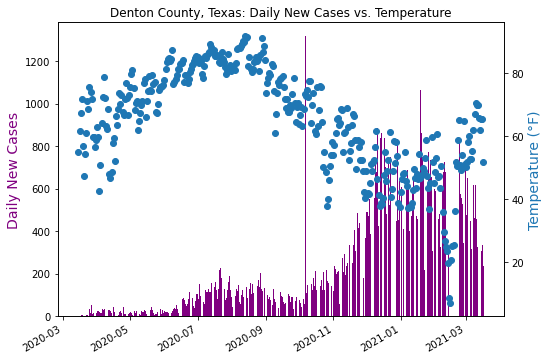

In [41]:
#%matplotlib notebook
#from matplotlib.dates import DateFormatter
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
#from matplotlib import dates as mpl_dates

denton_df=daily_df[daily_df['county']== "Denton"]
dates=denton_df['date']

dates = pd.to_datetime(dates)

cases=denton_df['new_cases']
temp= denton_df['temperature']
temp= (temp * 1.8) + 32 

fig= plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(111)
ax1.bar(dates, cases, color="purple")
ax1.set_ylabel("Daily New Cases",color="purple",fontsize=14)

ax2 = ax1.twinx() 
ax2.scatter(dates, temp)
ax2.set_ylabel("Temperature (°F)",color="tab:blue",fontsize=14)

plt.gcf().autofmt_xdate()

plt.title("Denton County, Texas: Daily New Cases vs. Temperature")
plt.savefig('../Plots/Weather/Denton_temp_cases.png')
#plt.scatter(temp, cases)

In [69]:
# %matplotlib notebook
# from matplotlib.dates import DateFormatter
# #import matplotlib.ticker.Formatter
# date_form = DateFormatter("%m-%d")
# months = mdates.MonthLocator() 

# denton_df=covid_weather_df[covid_weather_df['county_x']== "Denton"]
# dates=denton_df['date']
# cases=denton_df['cases']
# temp= denton_df['temperature (degC)']

# fig, ax1 = plt.subplots()
# ax1.plot(dates, cases)
# #plt.xticks (pd.date_range('2020-03-15', '2021-03-17', freq="M"))
# ax1.xaxis.set_major_formatter(months)
# #ax1.xaxis.set_major_locator(months)
# # ax2.xaxis.set_major_locator(months)
# ax2 = ax1.twinx() 
# ax2.plot(date, temp)
# ax2.set_ylabel("temp(degC)")
# ax2.tick_params(axis='y')


# fig.autofmt_xdate()

In [109]:
daily_df.columns

Index(['date', 'temperature', 'wind_speed', 'surface_solar_radiation',
       'total_cloud_cover', 'total_precipitation', 'relative_humidity',
       'county', 'state', 'fips', 'state_id', 'population', 'lat', 'lng',
       'cases', 'deaths', 'cases_per_100k', 'deaths_per_100k',
       'new_cases_per_100k', 'new_deaths_per_100k', 'new_cases', 'new_deaths'],
      dtype='object')

In [15]:
agg_df=daily_df.groupby('county').agg({
    'temperature':['median'], 
    'wind_speed':['median'], 
    'surface_solar_radiation':['median'],
    'total_cloud_cover':['median'], 
    'total_precipitation':['median'], 
    'relative_humidity':['mean'],
    'population':['max'], 
    'cases':['max'], 
    'deaths':['max'], 
    'cases_per_100k':['max'], 
    'deaths_per_100k':['max']
})

In [16]:
#drop nested headers
#agg_df.columns=agg_df.columns.droplevel(1)
len(agg_df)

58

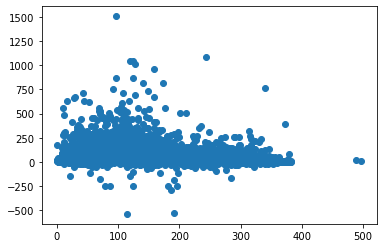

In [12]:
plt.scatter(daily_df['surface_solar_radiation'],daily_df['new_cases_per_100k'])
